<a href="https://colab.research.google.com/github/Faseeh-Ops/Cats-vs-Dogs-Classifier/blob/main/Cats_vs_Dogs_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:09<00:00, 207MB/s]
100% 1.06G/1.06G [00:09<00:00, 118MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout


In [5]:
#generators

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [6]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [8]:
#normalize

In [7]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds =validation_ds.map(process)

In [41]:

#create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,276,865 (50.65 MB)

 Trainable params: 13,275,905 (50.64 MB)

 Non-trainable params: 960 (3.75 KB)

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
history =model.fit(train_ds,epochs=9,validation_data=validation_ds)

Epoch 1/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 96ms/step - accuracy: 0.5405 - loss: 1.6307 - val_accuracy: 0.5430 - val_loss: 0.6759
Epoch 2/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 90ms/step - accuracy: 0.6609 - loss: 0.6134 - val_accuracy: 0.6730 - val_loss: 0.6096
Epoch 3/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 95ms/step - accuracy: 0.7538 - loss: 0.5071 - val_accuracy: 0.7452 - val_loss: 0.5224
Epoch 4/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8018 - loss: 0.4304 - val_accuracy: 0.6656 - val_loss: 0.5491
Epoch 5/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8472 - loss: 0.3487 - val_accuracy: 0.8720 - val_loss: 0.3036
Epoch 6/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.8995 - loss: 0.2429 - val_accuracy: 0.6586 - val_loss: 0.7626
Epoch 7/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.9301 - loss: 0.1777 - val_accuracy: 0.8722 - val_loss: 0.3326
Epoch 8/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.9537 - loss: 0.1258 - val_accu

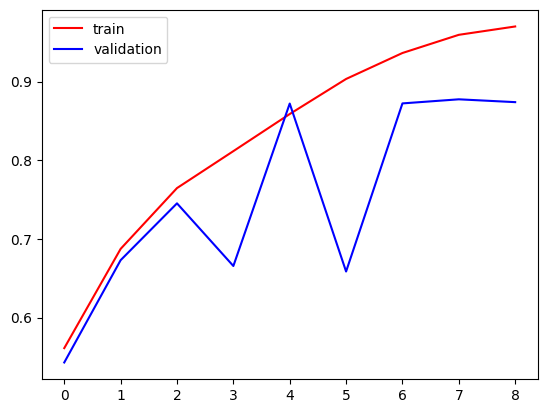

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

plt.legend()
plt.show()
#

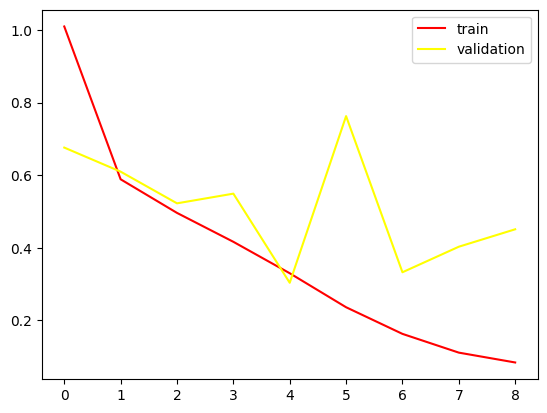

In [46]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='yellow',label='validation')
plt.legend()
plt.show()


In [47]:
train_loss, train_accuracy = model.evaluate(train_ds, verbose=0)
val_loss, val_accuracy = model.evaluate(validation_ds, verbose=0)

# Print the final training and validation accuracies and losses
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

Final Training Accuracy: 0.9597
Final Validation Accuracy: 0.8738
Final Training Loss: 0.1244
Final Validation Loss: 0.4509


In [48]:
import cv2

In [78]:
test_img=cv2.imread('/content/cat.jpg')

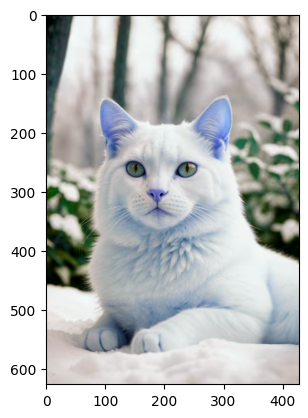

In [79]:
plt.imshow(test_img)

In [80]:
test_img.shape

(626, 428, 3)

In [81]:
test_img=cv2.resize(test_img,(256,256))

In [82]:
test_input=test_img.reshape((1,256,256,3))

In [83]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


array([[0.]], dtype=float32)

In [76]:


# Save the trained model
model.save("/content/dogs_vs_cats_model.h5")  # Save it to the desired path
print("Model saved successfully.")

# Load the saved model
model = tf.keras.models.load_model("/content/dogs_vs_cats_model.h5")
print("Model loaded successfully.")


Model saved successfully.


Model loaded successfully.


In [77]:
# Install necessary libraries
!pip install gradio tensorflow

# Import libraries
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the trained model (ensure it's saved in the Colab directory)
model = tf.keras.models.load_model("/content/dogs_vs_cats_model.h5")

# Define the prediction function
def predict_image(image):
    # Resize the uploaded image to match the model input size
    img = image.resize((256, 256))  # Resize to model's input size
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(img_array)
    predicted_label = int(prediction[0] > 0.5)  # 0 -> Cat, 1 -> Dog
    confidence = prediction[0][0] if predicted_label == 1 else 1 - prediction[0][0]

    # Define the class names
    class_names = {0: "Cat", 1: "Dog"}
    result = f"This is a **{class_names[predicted_label]}** with a confidence of {confidence:.2f}."

    return result

# Create a Gradio interface with a customized UI
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload an Image"),  # Add label for image input
    outputs=gr.Textbox(label="Prediction Result"),  # Display result in a text box
    title="Dog vs Cat Classifier",
    description="Upload an image to determine whether it is a Cat or a Dog.\n\nThe model uses a trained CNN to predict the result. **Confidence** shows the model's certainty about its prediction.",
    examples=["example_dog.jpg", "example_cat.jpg"],  # Optional: Replace with actual image paths
    theme="huggingface",  # Add a simple Gradio theme for better visuals
)

# Launch the interface
interface.launch(share=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:1049: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-675d98d2-34ab0f9c6c6989077403d7ba;c27bcac1-f0e6-43a4-a479-281e98ccc799)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://54a07f6f35cb0b2f71.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
